# An Illustration of Gradient Boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
%matplotlib inline

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


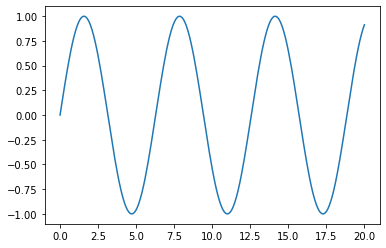

In [13]:
X = np.linspace(0, 20, 201)
y = np.sin(X)
plt.plot(X, y);

### Step 1 

Here, all we are doing is using an average of our values as a model of our data. Note that the "actual function" of our data is a sine curve. We are going to try to approximate that by way of gradient boosting and a decision tree regressor!

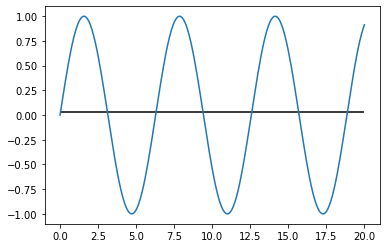

In [14]:
plt.plot(X, y)
f0 = y.mean()
plt.hlines(f0, 0, 20);

##### OK, so we have our extremely basic, extremely inaccurate model. Let's go ahead and build off of that.

In [15]:
# Residuals

e0 = y - f0
e0

array([-0.03169512,  0.0681383 ,  0.16697421,  0.26382509,  0.35772323,
        0.44773042,  0.53294736,  0.61252257,  0.68566097,  0.75163179,
        0.80977587,  0.85951224,  0.90034397,  0.93186307,  0.95375461,
        0.96579987,  0.96787849,  0.95996969,  0.94215251,  0.91460497,
        0.87760231,  0.83151425,  0.77680129,  0.7140101 ,  0.64376806,
        0.56677703,  0.48380625,  0.39568476,  0.30329303,  0.20755421,
        0.10942489,  0.00988555, -0.09006926, -0.18944081, -0.28723622,
       -0.38247834, -0.47421556, -0.56153126, -0.64355301, -0.71946128,
       -0.78849761, -0.84997223, -0.90327089, -0.94786105, -0.98329719,
       -1.00922523, -1.02538612, -1.03161837, -1.02785973, -1.01414773,
       -0.99061939, -0.9575098 , -0.91514977, -0.86396256, -0.8044596 ,
       -0.73723544, -0.66296175, -0.58238066, -0.4962973 , -0.40557178,
       -0.31111062, -0.21385762, -0.11478452, -0.01488122,  0.08485409,
        0.18342487,  0.27984625,  0.3731548 ,  0.46241823,  0.54

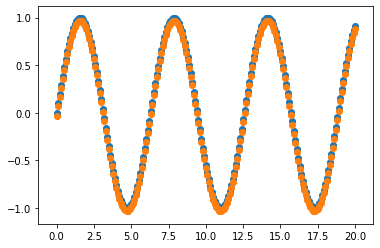

In [41]:
## Plotting residuals
plt.scatter(X,y)
plt.scatter(X, e0);

### Step 2: fitting a "stump" to the residuals

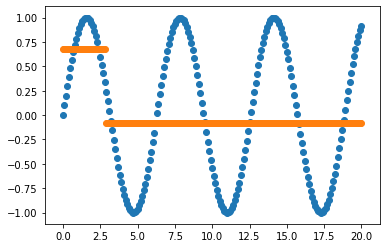

In [17]:
data = X.reshape(-1, 1)
f1 = DecisionTreeRegressor(max_depth=1)

f1.fit(data, e0)
ensemble_preds_1 = f1.predict(data) + f0

plt.scatter(X, y)
plt.scatter(X, ensemble_preds_1);

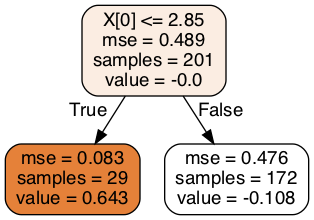

In [18]:
dot_file = StringIO()

export_graphviz(f1, out_file=dot_file, filled=True,
               rounded=True)

image=pydotplus.graph_from_dot_data(dot_file.getvalue())
Image(image.create_png())

In [19]:
e0[:29].mean()

0.6432541793709723

In [20]:
e0[29:].mean()

-0.10845564652185001

In [21]:
f1.predict(data)

array([ 0.64325418,  0.64325418,  0.64325418,  0.64325418,  0.64325418,
        0.64325418,  0.64325418,  0.64325418,  0.64325418,  0.64325418,
        0.64325418,  0.64325418,  0.64325418,  0.64325418,  0.64325418,
        0.64325418,  0.64325418,  0.64325418,  0.64325418,  0.64325418,
        0.64325418,  0.64325418,  0.64325418,  0.64325418,  0.64325418,
        0.64325418,  0.64325418,  0.64325418,  0.64325418, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10

### Step 3: fitting another "stump" to the residuals of the previous model

In [22]:
e1 = np.sin(X) - (f0 + f1.predict(data))

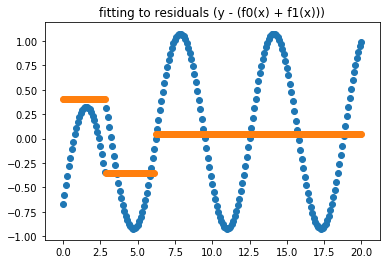

In [23]:
f2 = DecisionTreeRegressor(max_depth=1)
f2.fit(data, e1)
ensemble_preds_2 = f1.predict(data) + f2.predict(data) + f0
plt.scatter(X, e1)
plt.scatter(X, ensemble_preds_2)
plt.title('fitting to residuals (y - (f0(x) + f1(x)))');

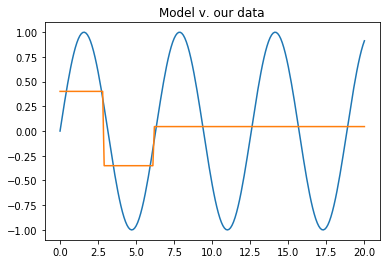

In [24]:
plt.plot(X, y)
plt.plot(X, ensemble_preds_2)
plt.title('Model v. our data');

### Fitting yet another "stump"

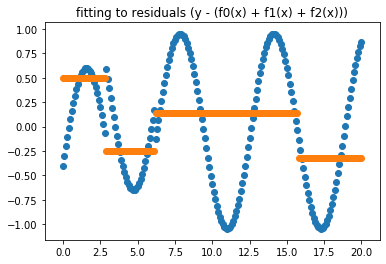

In [25]:
e2 = np.sin(X) - (f2.predict(data) + f1.predict(data) + f0)
f3 = DecisionTreeRegressor(max_depth=1)
f3.fit(data, e2)
plt.scatter(X, e2)
ensemble_preds_3 = f3.predict(data) + f2.predict(data) + f1.predict(data) + f0
plt.scatter(X, ensemble_preds_3)
plt.title('fitting to residuals (y - (f0(x) + f1(x) + f2(x)))');

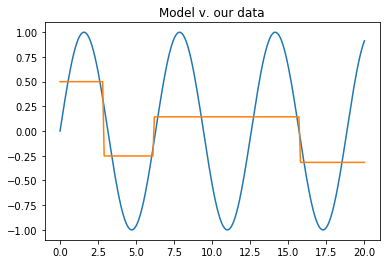

In [26]:
plt.plot(X, np.sin(X))
plt.plot(X, ensemble_preds_3)
plt.title('Model v. our data');

### Another one

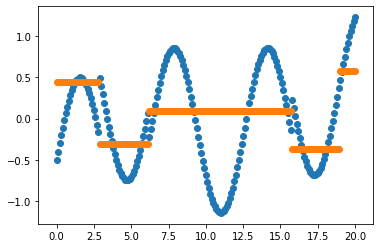

In [27]:
e3 = np.sin(X) - (f3.predict(data) + f2.predict(data) + f1.predict(data) + f0)
f4 = DecisionTreeRegressor(max_depth=1)
f4.fit(data, e3)
plt.scatter(X, e3)
ensemble_preds_4 = f4.predict(data) + f3.predict(data) + f2.predict(data) + f1.predict(data) + f0
plt.scatter(X, ensemble_preds_4);

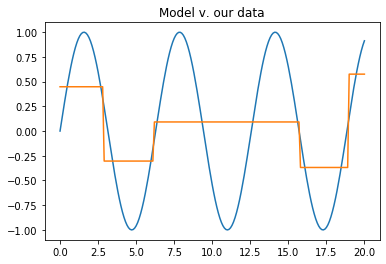

In [28]:
plt.plot(X, np.sin(X))
plt.plot(X, ensemble_preds_4)
plt.title('Model v. our data');

### and another

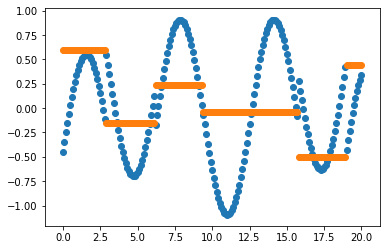

In [29]:
e4 = np.sin(X) - (f4.predict(data) + f3.predict(data) + f2.predict(data) + f1.predict(data) + f0)
f5 = DecisionTreeRegressor(max_depth=1)
f5.fit(data, e4)
plt.scatter(X, e4)
ensemble_preds_5 = f5.predict(data) + f4.predict(data) + f3.predict(data) + f2.predict(data) + f1.predict(data) + f0
plt.scatter(X, ensemble_preds_5);

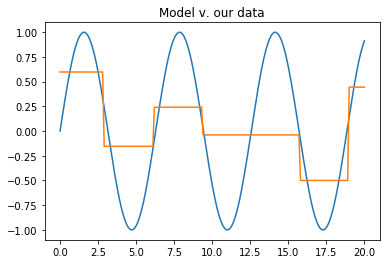

In [30]:
plt.plot(X, np.sin(X))
plt.plot(X, ensemble_preds_5)
plt.title('Model v. our data');

### Let's make a function already!

In [31]:
def simple_boosting_algorithm(X, y, n_learners, learner, learning_rate, show_each_step=True):
    """Performs a simple ensemble boosting model 
    params: show_each_step - if True, will show with each additional learner"""
    f0 = y.mean()
    residuals = y - f0
    ensemble_predictions = np.full(len(y), fill_value=f0)
    plt.figure(figsize=(20, 10))
    for i in range(n_learners):
        residuals = y - ensemble_predictions
        f = learner.fit(X.reshape(-1,1), residuals)
        ensemble_predictions = learning_rate * f.predict(X.reshape(-1, 1)) + ensemble_predictions
        if show_each_step:
            plt.plot(X, y)
            plt.plot(X, ensemble_predictions)
            
    plt.plot(X, y)
    plt.plot(X, ensemble_predictions)
            
    plt.title('With ' + str(n_learners) + ' learners with a depth of '+ str(learner.max_depth) +\
              ' and a learning rate of '+ str(learning_rate))
    
   

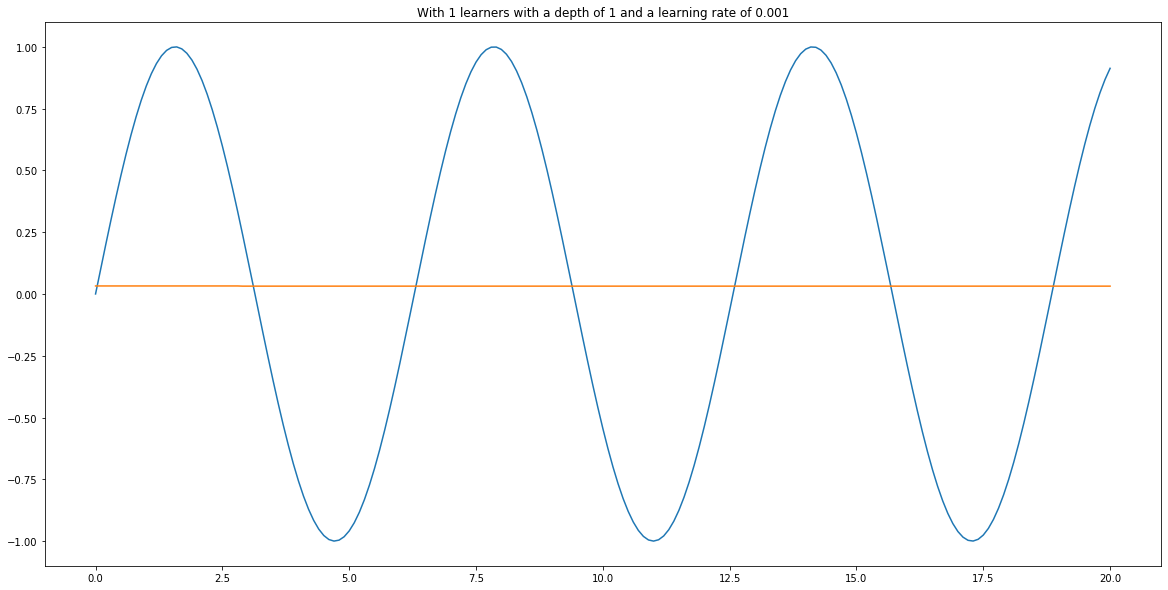

In [32]:
simple_boosting_algorithm(X, y, 1, DecisionTreeRegressor(max_depth=1), 0.001, False)

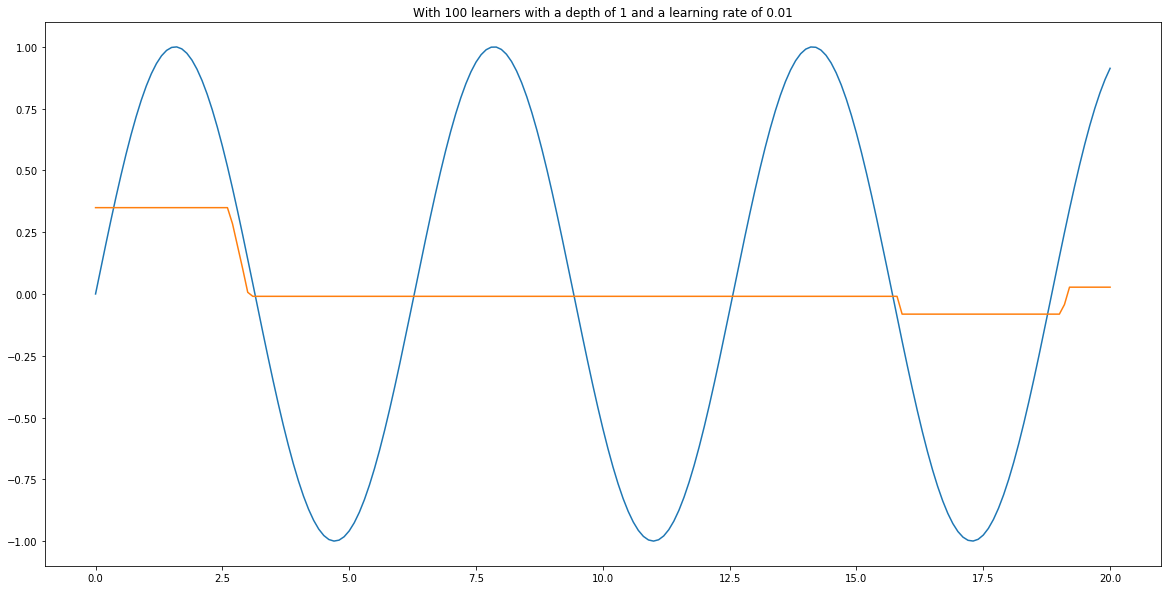

In [33]:
simple_boosting_algorithm(X, y, 100, DecisionTreeRegressor(max_depth=1), 0.01, False)

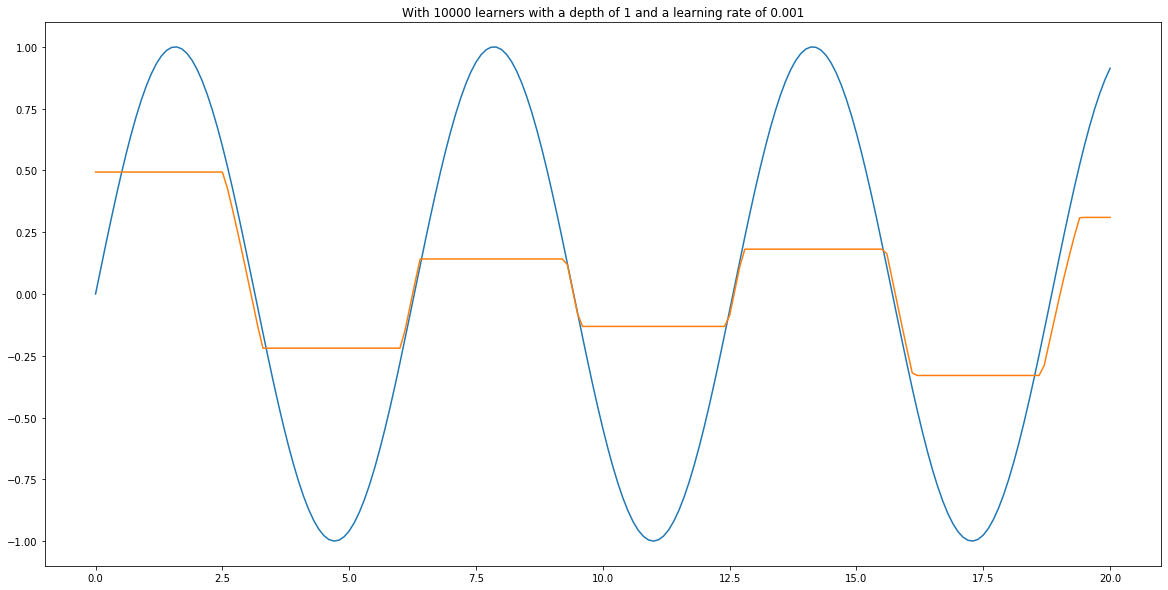

In [34]:
simple_boosting_algorithm(X, y, 10000, DecisionTreeRegressor(max_depth=1), 0.001, False)

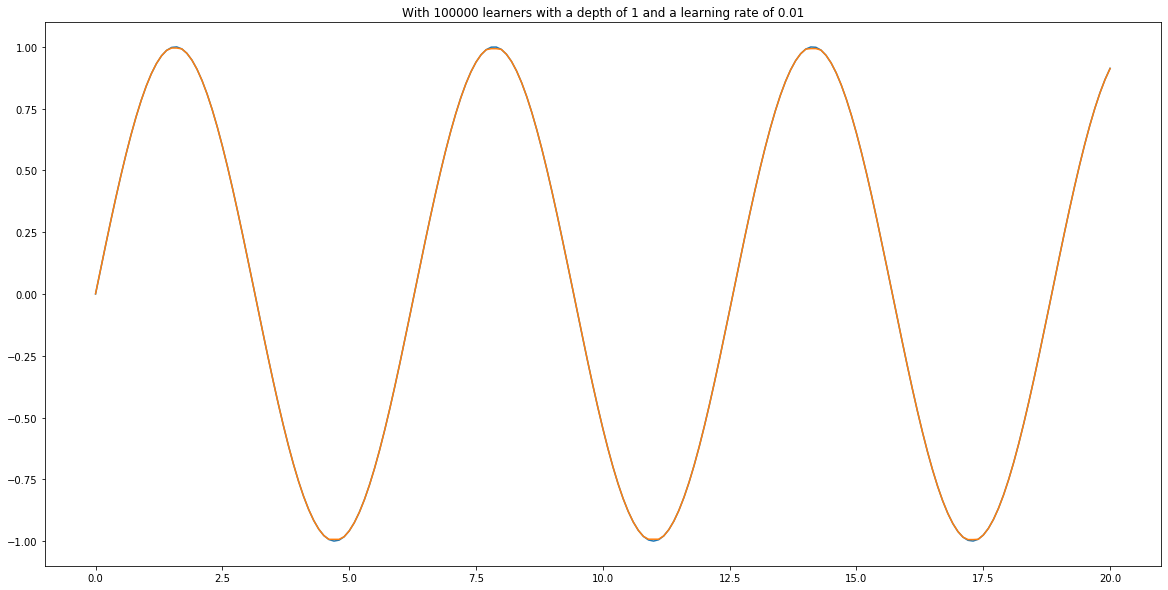

In [35]:
simple_boosting_algorithm(X, y, 100000, DecisionTreeRegressor(max_depth=1), 0.01, False)

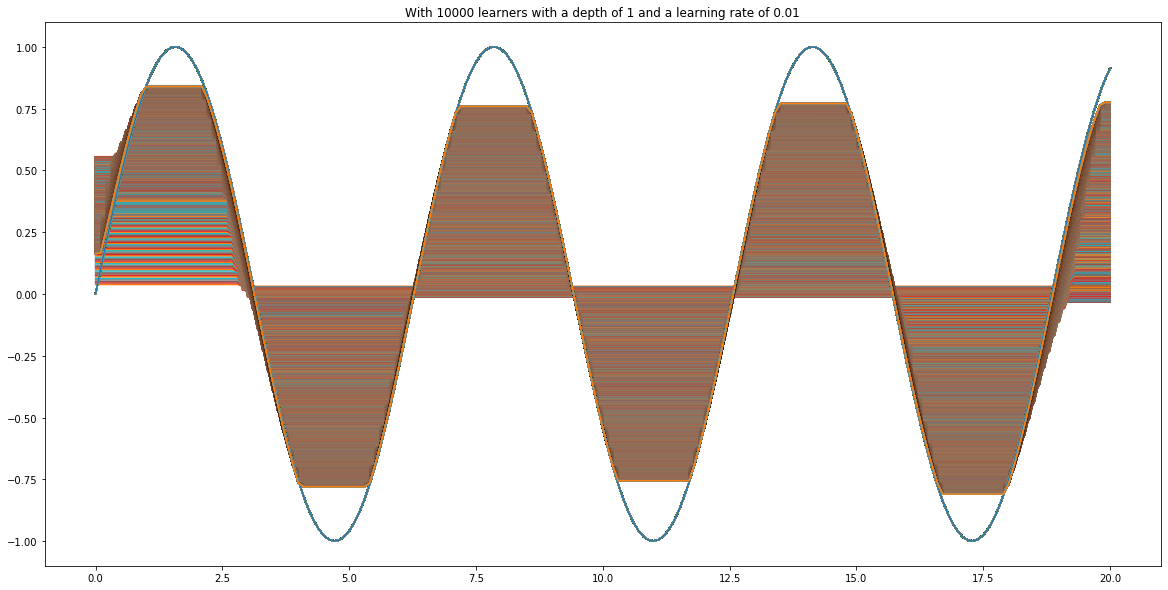

In [36]:
# This takes a while!
simple_boosting_algorithm(X, y, 10000, DecisionTreeRegressor(max_depth=1), 0.01)

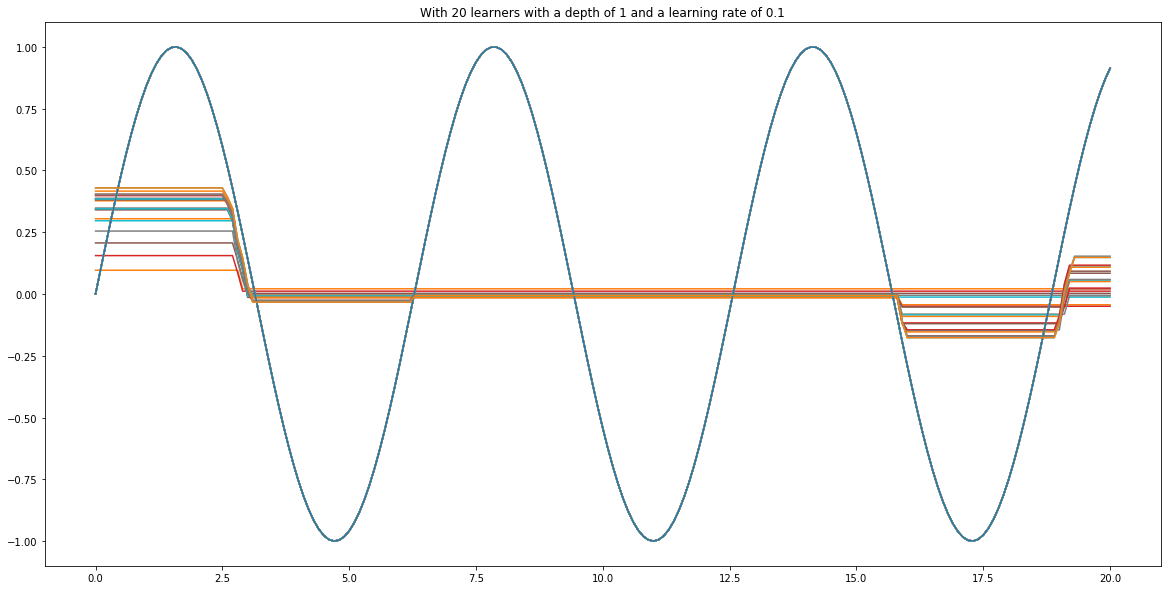

In [37]:
simple_boosting_algorithm(X, y, 20, DecisionTreeRegressor(max_depth=1), 0.1)

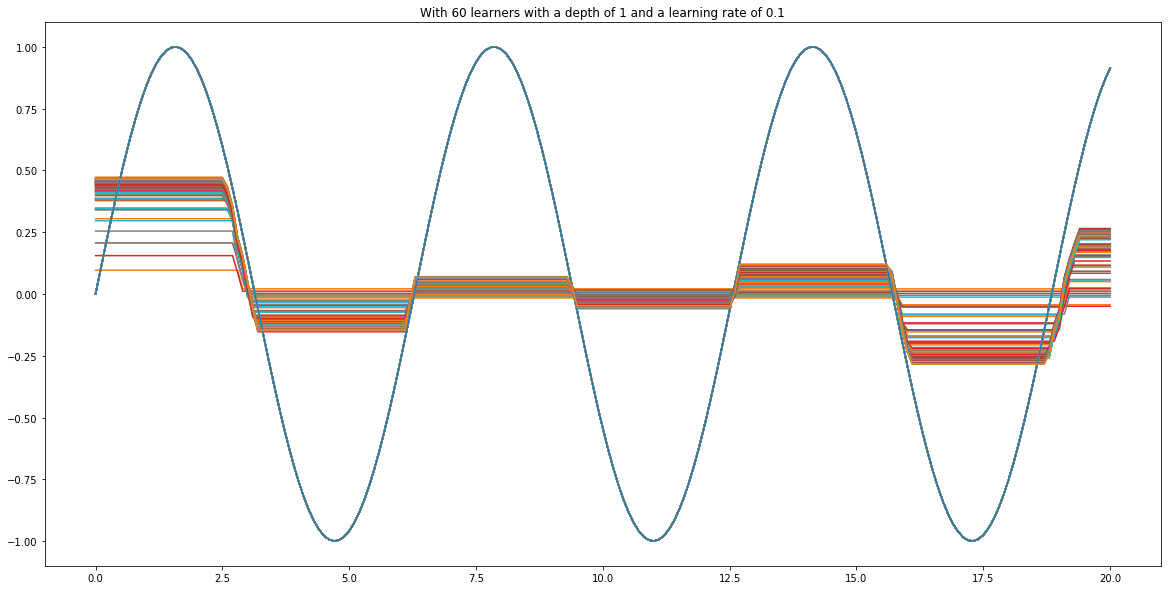

In [38]:
simple_boosting_algorithm(X, y, 60, DecisionTreeRegressor(max_depth=1), 0.1)

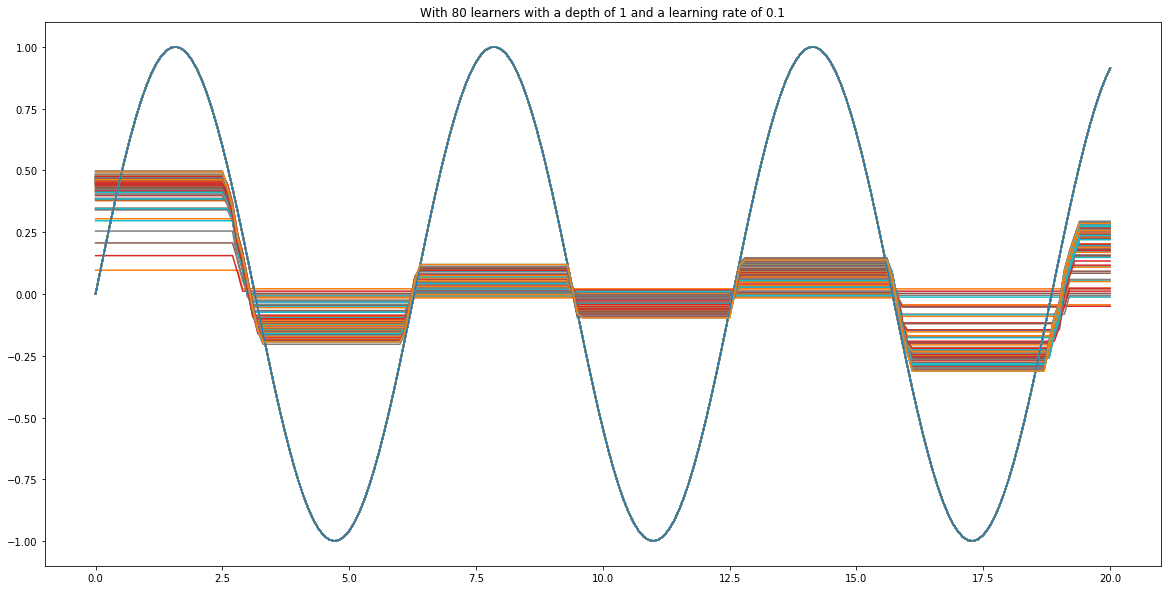

In [39]:
simple_boosting_algorithm(X, y, 80, DecisionTreeRegressor(max_depth=1), 0.1)

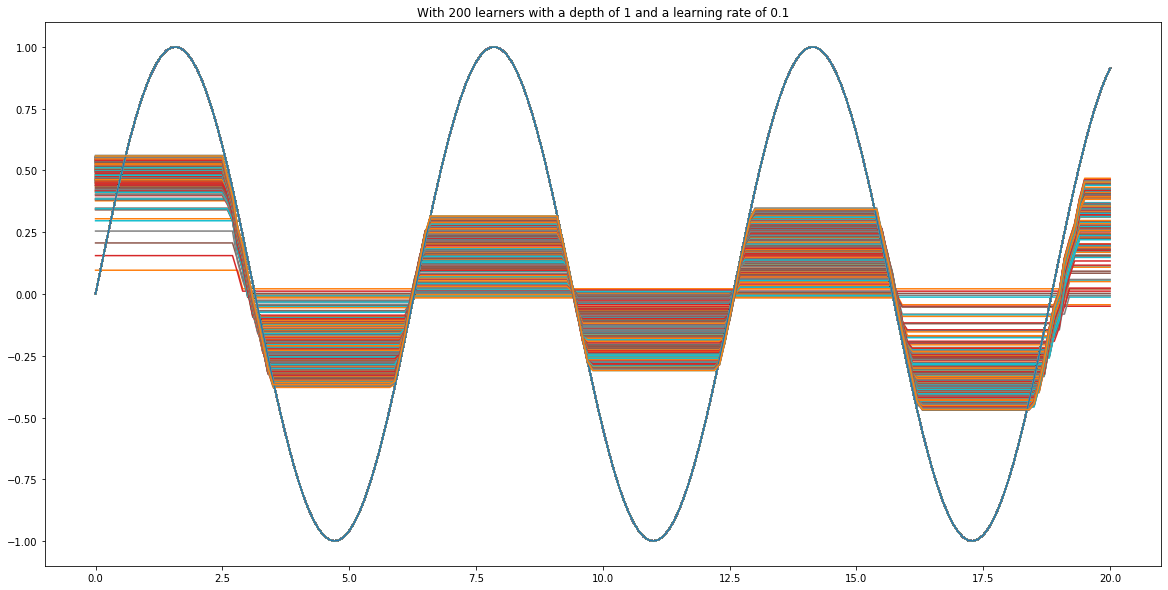

In [40]:
simple_boosting_algorithm(X, y, 200, DecisionTreeRegressor(max_depth=1), 0.1)